[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zlik/llama-stack/blob/main/docs/getting_started/04_ImageUnderstanding.ipynb)

## 4. Image Understanding with Llama 3.2

Below is a complete example of to ask Llama 3.2 questions about an image.

### 4.1 Setup and helpers


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  275k  100  275k    0     0   901k      0 --:--:-- --:--:-- --:--:--  903k


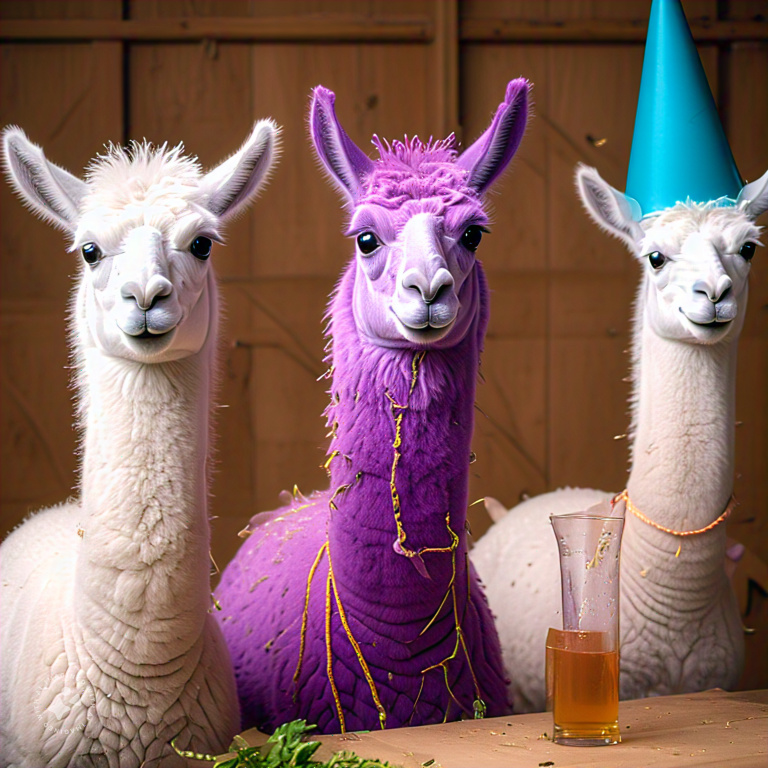

In [29]:
!curl -O https://raw.githubusercontent.com/meta-llama/llama-models/refs/heads/main/Llama_Repo.jpeg

from IPython.display import Image
Image("Llama_Repo.jpeg", width=256, height=256)



In [30]:
import base64
vision_model_id = "meta-llama/Llama-3.2-11B-Vision-Instruct"

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        base64_string = base64.b64encode(image_file.read()).decode("utf-8")
        base64_url = f"data:image/png;base64,{base64_string}"
        return base64_url

### 4.2 Using Llama Stack Inference API for multimodal inference

In [31]:
response = client.inference.chat_completion(
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": {
                        "url": {
                            "uri": encode_image("Llama_Repo.jpeg")
                        }
                    }
                },
                {
                    "type": "text",
                    "text": "How many different colors are those llamas? What are those colors?",
                }
            ]
        }
    ],
    model_id=vision_model_id,
    stream=False,
)

print(response.completion_message.content)

There are three llamas in the image. The llama in the middle is purple, the llama on the left is white, and the llama on the right is also white, but it is wearing a blue party hat. Therefore, there are two different colors of llama in the image: purple and white.
